# Practica algoritmo k-means 

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Cargar la matriz de datos X
X = np.loadtxt('ex3K.txt',delimiter=',')
#Mostrar las dimensiones (n) y el numero de ejemplos (m)
m = len(X)
print(m)
n = len(X[0])
print(n)


198
2


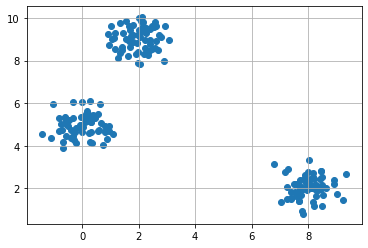

In [23]:
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
plt.show()

Implementación del algoritmo K-means. Primero vamos a inicializar todas las variables que necesitamos.
- k va a ser el número de clusteres
- centroids va a ser un vector en el que estarán los centroides iniciales, por lo tanto tiene que ser de dimensión Kxn. Vamos a crear centroides aleatorios. Para que esten dentro del rango de los datos puedes partir del centro de los datos y añadir o restar valores aleatorios.
- c es un vector en el que aparecerá el número del cluster al que está asígnado cada elemento
- J es un vector en el que vamos a ir guardando los valores de la función objetivo

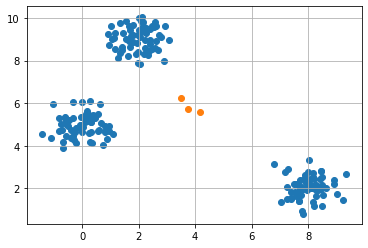

In [24]:
k = 3
centroids = np.random.rand(k,n)
media = X.mean(axis=0)
centroids = media + centroids
c = np.zeros((m), dtype=np.int) + 1

plt.scatter(X[:,0], X[:,1])
plt.scatter(centroids[:,0], centroids[:,1])
plt.grid(True)
plt.show()

Una vez que hemos inicializado las variables necesarias, vamos a crear dos funciones, una que llamaremos asigna, que se encarga de asignar, es decir de poner en el vector c, a cada elemento el cluster más cercano (los clusteres los llamaremos 1, 2, 3, etc.). La otra función que llamaremos actualiza, será la encargada de calcular la posición de los nuevos centroides, si nos dan un nuevo vector c.

Crea una función "asigna" a la se le pasen como parámetros los ejemplos y los centroides y devuelva un vector c en el que aparezca el cluster más cercano, es decir el cluster cuyo centroide este a una distancía euclídea mínima.

In [25]:
def asigna(datos, centroides):
    m = datos.shape[0]
    n = datos.shape[1]
    c = np.zeros((m), dtype=np.int) + 1
    i = 0
    for dato in datos:
        dis = 9999999
        j = 0
        for cen in centroides:
            actdis = (dato[0] - cen[0])**2 + (dato[1] - cen[1])**2
            if  actdis < dis:
                c[i] = j + 1
                dis = actdis
            j = j + 1
        i = i + 1
    return c
                 

Comprobamos la función asigna:

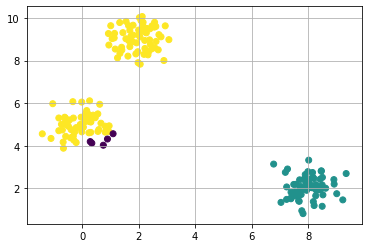

In [26]:
c = asigna(X,centroids)
plt.scatter(X[:,0], X[:,1], c = c)
plt.grid(True)
plt.show() 

Crea una función "actualiza" a la que se le pasen como parámetros los ejemplos, el vector c (el vector que muestra el cluster al que está asignado cada ejemplo) y el número de clusteres que estamos buscando y devuelva un vector con los valores de los centroides.

In [27]:
def actualiza(datos, centroides, c, k):
    n = datos.shape[1]
    for i in range(k-1):
        j = 0
        datosk = []
        for dato in datos:
            if c[j] == i + 1:
                datosk.append(dato)
            j = j + 1
        dk = np.array(datosk)
        #print dk.mean(axis=0)
        centroides[i,:] = dk.mean(axis=0)
    return centroides

  

Comprobamos la función actualiza

[[3.74980241 5.73263315]
 [4.16068278 5.59832125]
 [3.49424531 6.23821348]]
[[0.674504   4.24636   ]
 [8.00524242 2.05894424]
 [3.49424531 6.23821348]]


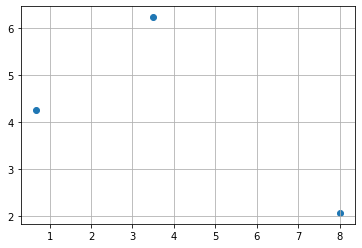

In [28]:
print(centroids)
centroids = actualiza(X,centroids, c,k)
print(centroids) 

plt.scatter(centroids[:,0], centroids[:,1])
plt.grid(True)
plt.show() 

Finalmente vamos a crear una función que calcule el valor de la función objetivo, dados unos ejemplos, unos centroides y un vector de asignaciones.

In [29]:
def coste(datos, centroides, c):
    m = datos.shape[0]
    i = 0
    coste = 0
    for dato in datos:
        cen = centroides[c[i]-1]
        coste = coste + (dato[0] - cen[0])**2 + (dato[1] - cen[1])**2
        i =i + 1
    coste = (1.0/m)*coste
    return coste
        

Finalmente creamos el algoritmo. Primero vamos a ejecutarlo con un número de iteraciones fijo (iter = 10). Imprime en una gráfica el valor la función objetivo para ver que ésta decrece y por lo tanto el algoritmo está convergiendo.

3.9465397536824205
3.9465397536824205
3.9465397536824205
3.9465397536824205
3.9465397536824205
3.9465397536824205
3.9465397536824205
3.9465397536824205
3.9465397536824205
3.9465397536824205


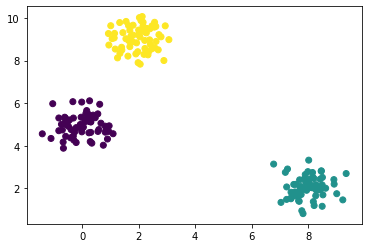

[[-0.01683136  4.95870606]
 [ 8.00524242  2.05894424]
 [ 3.49424531  6.23821348]]


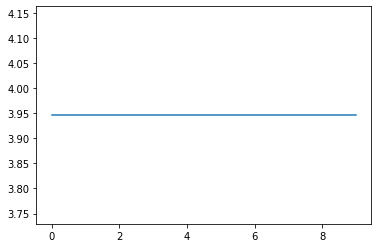

In [30]:
# Algoritmo k-means
J = []
for it in range(10):
    c = asigna(X,centroids)
    centroids = actualiza(X,centroids, c,k)
    J.append(coste(X,centroids, c))
    print(coste(X,centroids, c))
#plt.plot(J)
plt.scatter(X[:,0], X[:,1],c=c)
plt.show()

print(centroids)

plt.plot(J)
plt.show()


Ya hemos conseguido que el algoritmo k-means funcione. Ahora debes crear una función que ejecute el algoritmo k-means con cien inicializaciones aleatorias diferentes y devuelva los centroides y el vector c de la solución con menor valor de la función objetivo.

In [31]:
def ejecutaKmeans(X,k):
    Jant = 10**9
    for i in range(100):
        centroids = np.random.rand(k,n)
        media = X.mean(axis=0)
        centroids = media + centroids
        c = np.zeros((m), dtype=np.int) + 1
        J = []
        for it in range(10):
            c = asigna(X,centroids)
            centroids = actualiza(X,centroids, c,k)
            J.append(coste(X,centroids, c))
        if J[9] < Jant:
            c_fin = c
            centroids_fin = centroids
            Jant = J[9]
    return Jant, centroids_fin, c_fin

C:\Users\usuario\.conda\envs\py37machlearn\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
C:\Users\usuario\.conda\envs\py37machlearn\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


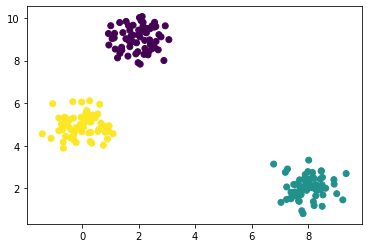

[[ 1.97705045  9.0467803 ]
 [ 8.00524242  2.05894424]
 [-0.01683136  4.95870606]
 [ 3.73878975  5.80282546]]


In [32]:
k = 4
J, centroids, c = ejecutaKmeans(X,k)
plt.scatter(X[:,0], X[:,1],c=c)
plt.show()

print(centroids)

El último paso es programar el índice Davies–Bouldin para comprobar dados uno datos y un vector c, saber como de buena es esa partición. Crea una función que tenga como parámetros el conjunto de datos, el número de clústeres, el vector c, y los centroides y devuelva el valor DB.

C:\Users\usuario\.conda\envs\py37machlearn\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
C:\Users\usuario\.conda\envs\py37machlearn\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\usuario\.conda\envs\py37machlearn\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
C:\Users\usuario\.conda\envs\py37machlearn\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\usuario\.conda\envs\py37machlearn\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
C:\Users\usuario\.conda\envs\py37machlearn\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C

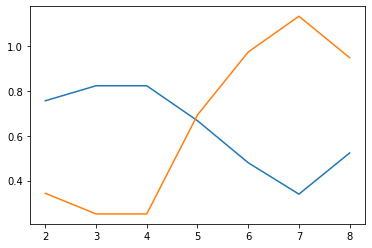

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

silhouette_avg = []
bd_score = []

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:
    J, centroids, cluster_labels = ejecutaKmeans(X,n_clusters)
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    bd_score.append(davies_bouldin_score(X, cluster_labels))
    
plt.plot(range_n_clusters, silhouette_avg)
plt.plot(range_n_clusters, bd_score)



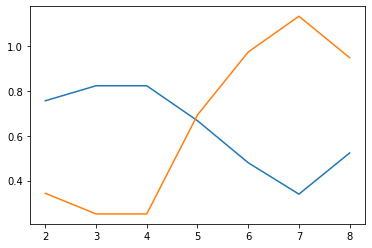

In [34]:
plt.plot(range_n_clusters, silhouette_avg)

plt.plot(range_n_clusters, bd_score)

Comprueba para conjunto de datos, si el valor de mínimo de DB (para k=2, 3, 4, .., 8) coincide con el número de clústeres que hay realmente en el conjunto de datos.